In [83]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [84]:
Data = pd.read_csv('Data_Set.csv', encoding='latin-1')
train_Data_pre = Data['Outcome']
del Data['Outcome']
Data.head()

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi
0,0.997670,0.981601,0.998441,0.052944,-0.047965,0.007129,0.571426,0.546076,0.521865,-0.125533,-0.014673,0.020927
1,1.020329,0.950854,0.992265,-0.119771,0.051500,-0.084709,0.527034,0.545367,0.526761,-0.854249,-0.474678,-0.108012
2,0.998375,0.925627,0.978745,0.095955,-0.200215,-0.019342,0.658326,0.593212,0.511661,0.281087,0.218465,0.024043
3,0.999966,0.999860,1.000000,0.000034,0.000140,0.000003,0.523584,0.523602,0.523572,0.000014,-0.000004,0.000028
4,0.993500,1.017797,1.003141,-0.040797,0.087278,0.000783,0.461181,0.488679,0.522015,-0.126420,-0.096365,-0.018234


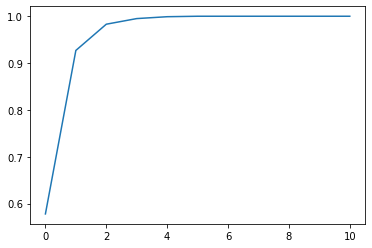

In [85]:
# Метод главных компонент PCA - уменьшаем размерность данных
data_numpy = Data.to_numpy() # Конвертация в numpy массив
data_features = data_numpy[:,:12]

from sklearn.decomposition import PCA

pca = PCA(n_components = 11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент
data_features_transformed = pca.fit(data_features)

# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

# Построим график зависимости доли объясненной дисперсии от количества используемых ГК
plt.plot(np.arange(11), explained_variance, ls = '-')

In [86]:
# Преобразованный массив признаков по методу PCA
pca = PCA(n_components = 2, svd_solver='full') 
data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 3 компонент
data_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas
data_features

,0,1
0,-0.216627,-0.081210
1,-0.960368,0.281878
2,0.205735,-0.313994
3,-0.152854,-0.163970
4,-0.303291,-0.088900
...,...,...
2995,-0.152904,-0.164085
2996,-0.462543,0.209675
2997,0.026077,0.162566
2998,-0.150940,-0.159757


In [87]:
# Нормализация данных
from sklearn import preprocessing
normalization = preprocessing.StandardScaler().fit(data_features)
data_features = normalization.transform(data_features)
data_features = pd.DataFrame(data = data_features)  # Перевод из numpy ---> pandas
data_features

,0,1
0,-0.369059,-0.177776
1,-1.636139,0.617054
2,0.350502,-0.687359
3,-0.260411,-0.358943
4,-0.516705,-0.194610
...,...,...
2995,-0.260496,-0.359194
2996,-0.788015,0.458996
2997,0.044426,0.355870
2998,-0.257151,-0.349721


In [88]:
# Задание параметров модели k-means
kmeans = KMeans(algorithm = 'auto', n_clusters = 2, init = 'k-means++', 
                n_init = 10, max_iter = 1000, tol = 0.0001, verbose = 0, random_state = 42).fit(data_features)

In [89]:
# Назначеные кластеры (классы) для тренировочных данных
labels_train = kmeans.labels_
labels_train

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
# Координаты вычисленных центроидов
kmeans.cluster_centers_

array([[-0.21607654, -0.25413044],
       [ 1.68489008,  1.9816212 ]])

In [91]:
# Расчет коэффициента Силуета (Silhouette coefficient), который характеризуюет степень разделенности кластеров относительно друг друга
from sklearn.metrics import silhouette_score
Sil_score = silhouette_score(train_Data, labels_train)
Sil_score

0.7097190052767641

In [92]:
len(data_features)

3000

In [93]:
# from model on train_data
i = 0
n = 0
number_labels_zero = [i for j in labels_train if j == 0]
model_labels_zero = len(number_labels_zero)
number_labels_one = [n for m in labels_train if m == 1]
model_labels_one = len(number_labels_one)

# from train_data (truth)
i = 0
n = 0
number_labels_zero = [i for j in train_Data_pre if j == 0]
target_labels_zero = len(number_labels_zero)
number_labels_one = [n for m in train_Data_pre if m == 1]
target_labels_one = len(number_labels_one)

print('Number of Zeros is appointed by K-means: ', model_labels_zero,
      'Number of Zeros is appointed by me: ', target_labels_zero, '\n',
      'Number of units is appointed by K-means: ', model_labels_one,
      'Number of units is appointed by me: ', target_labels_one)

Number of Zeros is appointed by K-means:  2659 Number of Zeros is appointed by me:  1500 
 Number of units is appointed by K-means:  341 Number of units is appointed by me:  1500


In [94]:
K = range(1,12)
models = [KMeans(algorithm = 'auto', n_clusters = cluster, init = 'k-means++', 
                n_init = 10, max_iter = 1000, tol = 0.00001, verbose = 0, random_state = 42).fit(data_features) for cluster in K]
sum_dist = [model.inertia_ for model in models]

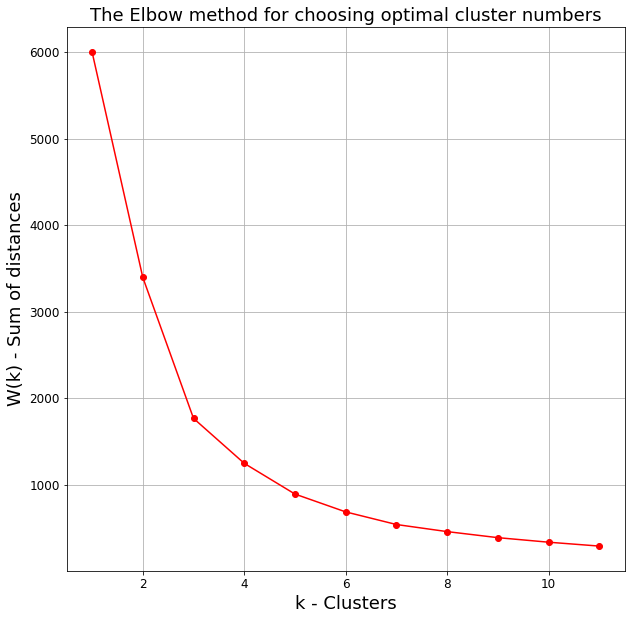

In [95]:
# График зависимости средней кластерной суммы расстояний от числа кластеров (Elbow method)
plt.subplots(figsize = (10,10))
plt.title('The Elbow method for choosing optimal cluster numbers', fontsize = 18)
plt.xlabel('k - Clusters', fontsize = 18)
plt.ylabel('W(k) - Sum of distances', fontsize = 18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.grid() 
plt.plot(K, sum_dist, marker = 'o', color ='r') 